## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
# What is the corresponding label in the training set?
y_train[333]

8

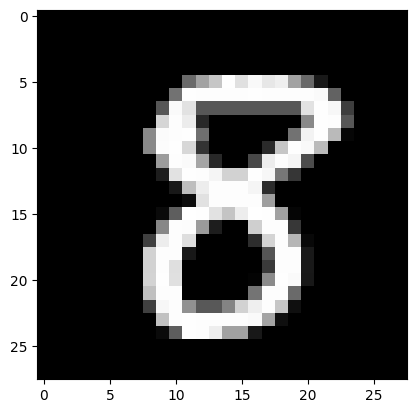

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [7]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [9]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [10]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

/Users/valendunn/Desktop/FPGA-ML/Intel Learning/intel/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate = learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [13]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7383 - loss: 0.8403 - val_accuracy: 0.9383 - val_loss: 0.2049
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.9189 - loss: 0.2701 - val_accuracy: 0.9537 - val_loss: 0.1507
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.9397 - loss: 0.2024 - val_accuracy: 0.9603 - val_loss: 0.1271
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.9480 - loss: 0.1720 - val_accuracy: 0.9657 - val_loss: 0.1152
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.9540 - loss: 0.1551 - val_accuracy: 0.9686 - val_loss: 0.1018
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9578 - loss: 0.1422 - val_accuracy: 0.9694 - val_loss: 0.1006
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9602 - loss: 0.1342 - val_accuracy: 0.9707 - val_loss: 0.0964
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9631 - loss: 0.1243 - val_

In [14]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10152925550937653
Test accuracy: 0.9776999950408936


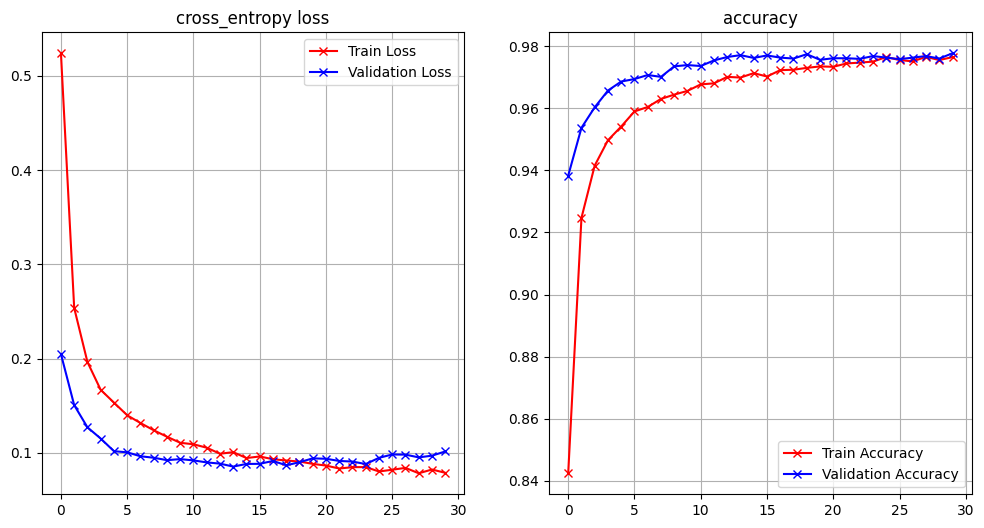

In [17]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [23]:
### Build your model here

#Mode creation following similar    
model_2 = Sequential([
    Dense(400, activation='relu', input_shape=(784,)),
    Dropout(0.4),
    Dense(300, activation="relu"),
    Dropout(0.4),
    Dense(10, activation="softmax")
])

/Users/valendunn/Desktop/FPGA-ML/Intel Learning/intel/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#training set up
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate = learning_rate),
              metrics=['accuracy'])

In [25]:
#training
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8308 - loss: 0.5519 - val_accuracy: 0.9582 - val_loss: 0.1343
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9519 - loss: 0.1641 - val_accuracy: 0.9707 - val_loss: 0.0985
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9640 - loss: 0.1194 - val_accuracy: 0.9739 - val_loss: 0.0830
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9693 - loss: 0.1025 - val_accuracy: 0.9766 - val_loss: 0.0819
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9744 - loss: 0.0871 - val_accuracy: 0.9772 - val_loss: 0.0795
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9743 - loss: 0.0838 - val_accuracy: 0.9804 - val_loss: 0.0694
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9790 - loss: 0.0716 - val_accuracy: 0.9810 - val_loss: 0.0700
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9796 - loss: 0.0652 - val_accuracy: 0.

In [26]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('loss:', score_2[0])
print('accuracy:', score_2[1])

loss: 0.07046536356210709
accuracy: 0.9851999878883362


## SOLUTION

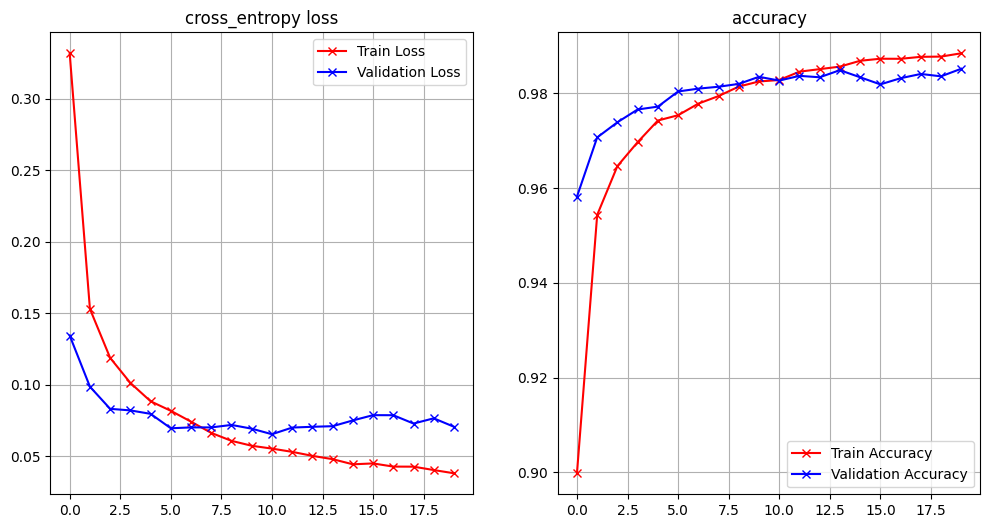

In [27]:
def plot_loss_accuracy(history_2):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_2.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_2.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_2.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_2.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history_2)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

1. While the validation accurracy did plateau, it was higher than in model_1. On the other hand it is so much larger than model_1 and if we were going into production model_1 would be my choice as it is only 0.8% better. So model_1 with its smaller size would be better. 
2. validation loss stops getting better much earlier in model_2 which seems to indicate overfitting at a much higher rate than model_1, for this while a high accuracy is very important at the higher rates I would much rather a lower loss than and marginally higher accuracy. Although in this case model_2 is better in both on the downside of being much bigger
3. I think the reason that model_2 is more accurate and has a smaller loss is that it has more nodes which would help parsing the numbers in a better way as it is a 28x28 grid not 8x8 so I upped the first layer to 112. It had an accuracy of 98.1 which is 0.4% less than model_2 and a similar loss, which makes Model_3 a better 

In [28]:
model_3 = Sequential([
    Dense(112, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/Users/valendunn/Desktop/FPGA-ML/Intel Learning/intel/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
learning_rate = .001
model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate = learning_rate),
              metrics=['accuracy'])

In [32]:
history_3 = model_3.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7738 - loss: 0.7422 - val_accuracy: 0.9471 - val_loss: 0.1736
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9371 - loss: 0.2164 - val_accuracy: 0.9610 - val_loss: 0.1248
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9504 - loss: 0.1651 - val_accuracy: 0.9683 - val_loss: 0.1055
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9594 - loss: 0.1346 - val_accuracy: 0.9722 - val_loss: 0.0944
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9644 - loss: 0.1180 - val_accuracy: 0.9736 - val_loss: 0.0889
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9685 - loss: 0.1040 - val_accuracy: 0.9754 - val_loss: 0.0843
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9715 - loss: 0.0928 - val_accuracy: 0.9757 - val_loss: 0.0839
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9738 - loss: 0.0827 - val_accuracy: 0.

In [33]:
score_3 = model_3.evaluate(x_test, y_test, verbose=0)
print('loss:', score_3[0])
print('accuracy:', score_3[1])


loss: 0.08024667948484421
accuracy: 0.9812999963760376


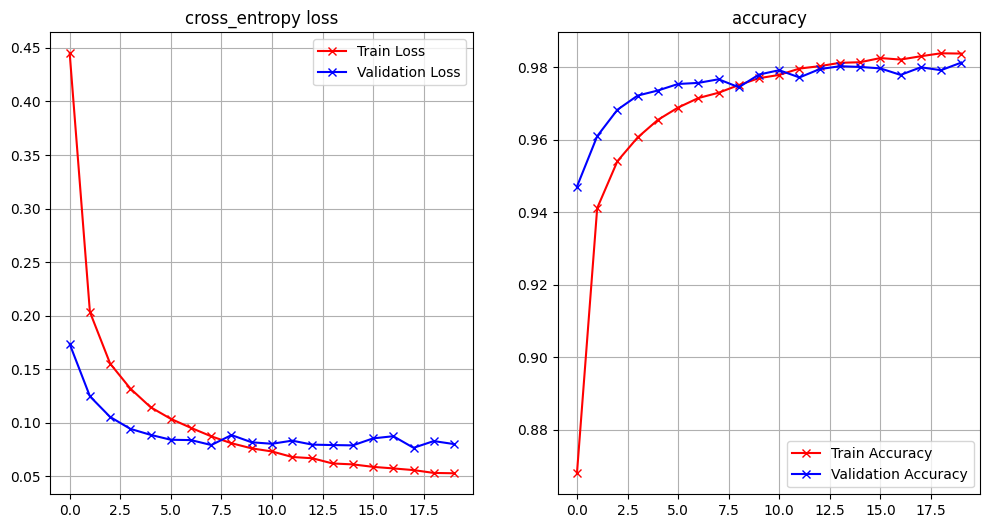

In [34]:

plot_loss_accuracy(history_3)